<a href="https://colab.research.google.com/github/abdisheikh94/dsc-project1/blob/master/dsc_phase1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Data Analysis of Aircraft Incidents for Business Strategy Minimizing Risk

## Business Understanding

Our company is planning to expand into the aviation industry by purchasing and operating aircraft for both commercial and private use. However, entering this market comes with significant risks related to safety and reliability. To support smarter decision-making, I was tasked with analyzing historical aviation accident data to identify which aircraft models and manufacturers have the lowest risk of incidents, injuries, and fatalities. By uncovering patterns and trends in the data, I aim to provide clear, actionable recommendations to help the company minimize risks and build a safe, successful aviation division.

## Data Understanding

The dataset contains civil aviation accidents and incidents involving US and international operations from 1962 to 2023.


In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/AviationData.csv', encoding='latin1')

# Preview first few rows
df.head()

<ipython-input-7-731a81ef93c1>:8: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/AviationData.csv', encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Basic information about the dataset

In [8]:
print("\nData Information:")
df.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make               

## Displaying the number of rows and columns

In [9]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (88889, 31)


## Statistical Summary

In [10]:
print("\nSummary Statistics:")
df.describe(include='all')


Summary Statistics:


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,82697,16648,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,...,26,13590,NaN,NaN,NaN,NaN,4,12,17074,2924
top,20001214X45071,Accident,WPR23LA045,1982-05-16,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,49448,258,NaN,NaN,NaN,NaN,77303,15428,61754,17019
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN


## Checking for missing values

In [11]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("\nMissing Values:\n", missing_values)


Missing Values:
 Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: int64


## Dropping irrelevant columns

In [13]:
df = df.drop(['Location', 'Country', 'Publication_Date','Report_Status',
              'Aircraft_Category',  'Broad_phase_of_flight','Schedule', 'Air_carrier',
              'FAR_Description', 'Longitude', 'Latitude', 'Airport_Code', 'Airport_Name'], axis=1, errors='ignore')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Visualizing missing data

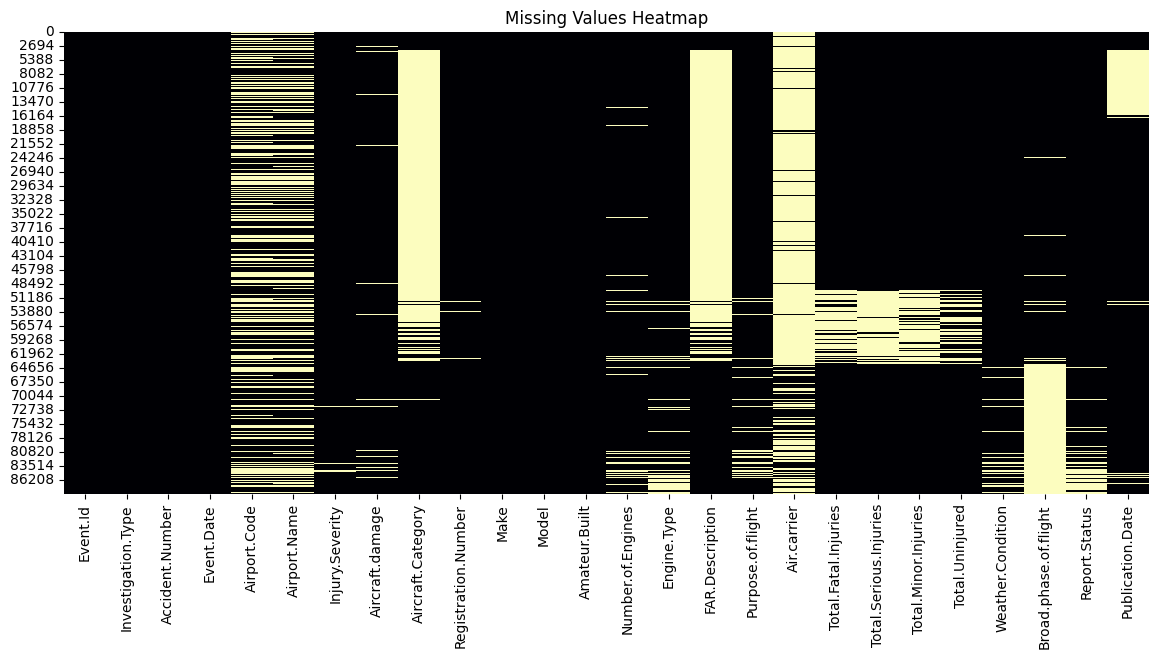

In [14]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title('Missing Values Heatmap')
plt.show()

# Data Cleaning

### Dropping columns with more than 30% missing values

In [18]:
threshold = len(df) * 0.3
cols_to_drop = missing_values[missing_values > threshold].index
df = df.drop(columns=cols_to_drop, errors='ignore')

## Filling remaining values with forward fill

In [19]:
data = df.fillna(method='ffill')

<ipython-input-19-8c21be8192a7>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = df.fillna(method='ffill')


## Verifying missing after cleaning

In [20]:
print("\nMissing Values after cleaning:\n", data.isnull().sum().sum())


Missing Values after cleaning:
 1


# Exploratory Data Analysis(EDA)

## Top 10 Aircraft Manufacturers

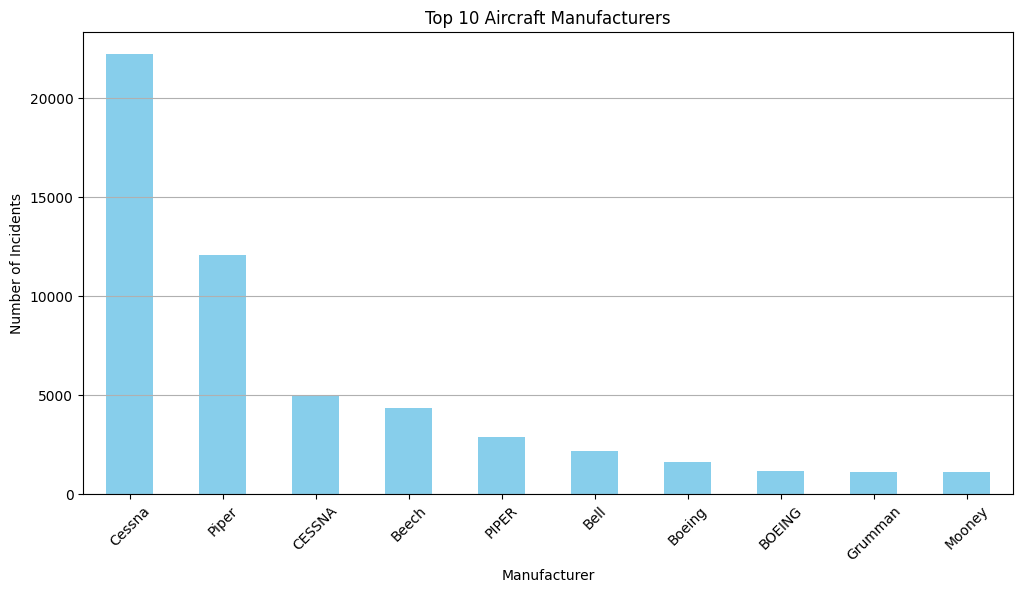

In [21]:
if 'Make' in data.columns:
    plt.figure(figsize=(12,6))
    data['Make'].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title('Top 10 Aircraft Manufacturers')
    plt.xlabel('Manufacturer')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

## Accidents by Phase of Flight

In [22]:
if 'Broad_Phase_of_Flight' in data.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(y='Broad_Phase_of_Flight', data=data, order=data['Broad_Phase_of_Flight'].value_counts().index, palette='viridis')
    plt.title('Accidents by Phase of Flight')
    plt.xlabel('Number of Incidents')
    plt.ylabel('Phase of Flight')
    plt.grid(axis='x')
    plt.show()

## Injury Severity Distribution

In [23]:
if 'Injury_Severity' in data.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x='Injury_Severity', data=data, palette='Set2', order=data['Injury_Severity'].value_counts().index)
    plt.title('Distribution of Injury Severity')
    plt.xlabel('Severity')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

## Correlation Matrix

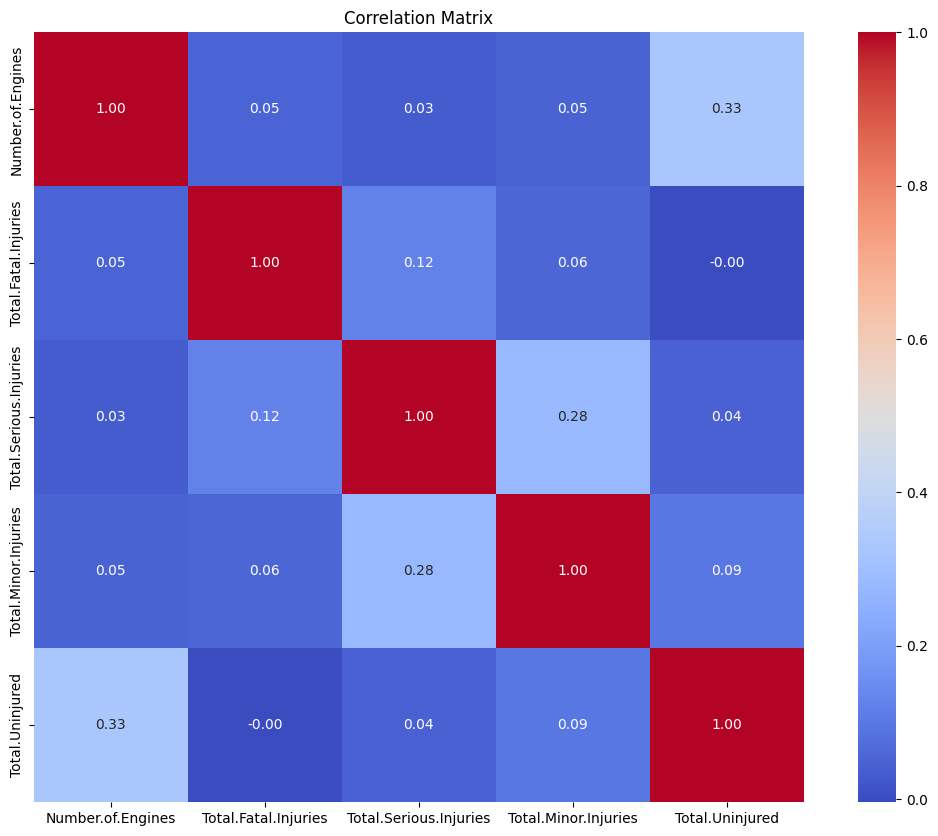

In [24]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Check if there are enough numeric columns
if not numeric_data.empty:
    plt.figure(figsize=(14,10))
    sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numeric data available for correlation matrix.")

# Save cleaned Data

In [25]:
data.to_csv('/content/sample_data/Cleaned_AviationData.csv', index=False)

print("\nCleaned dataset saved successfully!")


Cleaned dataset saved successfully!
